# Q2: 
In Matlab or python, implement the mean shift clustering algorithm as discussed in lectures and papers.  To do this, use a “flat” kernel function (you will need to specify the value for the radius parameter, λ). You can choose to implement as either a “blurring” or “non-blurring” process. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.random.randn(200,2)
b = a+4
c = np.copy(a)
c[:,0] = 3*c[:,0]
c = c-4 

In [3]:
d = np.vstack((a,b))
e = np.vstack((a,b,c))

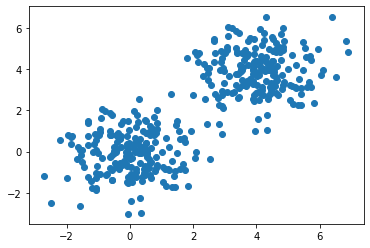

In [4]:
plt.scatter(d[:,0],d[:,1])

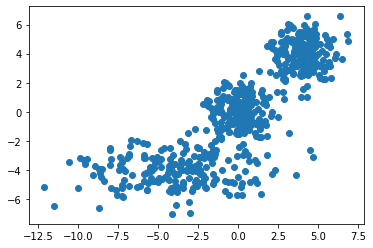

In [5]:
plt.scatter(e[:,0],e[:,1])

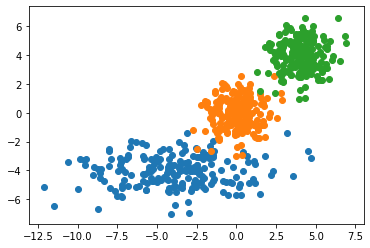

In [6]:
plt.scatter(c[:,0],c[:,1])
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

1. Set some initial centroids (means)
2. Use kernel to calculate and shift the means
3. Continue until converge

Assume that our data is in the format (num_samples, num_features) e.g x_0,x_1

In [7]:
#Need Meanshift
class MeanShift:
    def __init__(self, kernel, tolerance:float=0.01, blurring:bool=False):
        self._kernel = kernel
        self._tolerance = tolerance
        self._blurring = blurring #may or may not implement this
        
    def fit(self, data):
        assert(len(data.shape)==2)
        centroids = np.copy(data)
        while 1:
            old_centroids = np.copy(centroids)
            for i in range(centroids.shape[0]):
                sum_num = 0
                sum_den = 0
                for j in range(data.shape[0]):
                    kernel = self._kernel(centroids[i,:], data[j,:])
                    sum_num += kernel*data[j,:]
                    sum_den += 1 if kernel>0 else 0
                if sum_den != 0:
                    centroids[i,:] = sum_num/sum_den
            if (np.linalg.norm(centroids-old_centroids, axis=0)<self._tolerance).all():
                return centroids                
#Need Kernel
class FlatKernel:
    def __init__(self, radius):
        self._radius = radius
        
    def __call__(self, x , x_i, axis=None):
        return (np.linalg.norm(x-x_i, axis)<self._radius).astype(int)
    
class GaussianKernel:
    #disclaimer this is probs wrong
    def __call__(self, x, x_i):
        return np.exp(-np.pow(np.linalg.norm(x-x_i),2))


In [11]:
kernel = FlatKernel(2)
ms = MeanShift(kernel)

In [12]:
centroids = ms.fit(d)

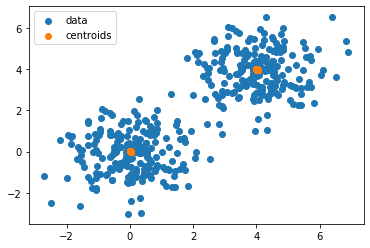

In [13]:
plt.scatter(d[:,0],d[:,1], label='data')
plt.scatter(centroids[:,0],centroids[:,1], label='centroids')
plt.legend()